In [1]:
# coding=utf-8
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-7167d251-f9fc-47c7-b1ed-e1de76896d8a',
    'IBM_API_KEY_ID': 'OHb_xuNNcWxBSsA-6eDhON-Czdpb0cVHftp5QtsSUKBQ',
    'ENDPOINT': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'walmartitemsclusteringgrouping-donotdelete-pr-tmytuzbvnpl4rv',
    'FILE': 'item cluster raw data.xlsx'
}

from ibm_botocore.client import Config
import ibm_boto3

cos = ibm_boto3.client(service_name='s3',
                      ibm_api_key_id=credentials_1['IBM_API_KEY_ID'],
                      ibm_service_instance_id=credentials_1['IAM_SERVICE_ID'],
                      ibm_auth_endpoint=credentials_1['IBM_AUTH_ENDPOINT'],
                      config=Config(signature_version='oauth'),
                      endpoint_url=credentials_1['ENDPOINT'])
cos.download_file(Bucket=credentials_1['BUCKET'], Key='item cluster raw data.xlsx', Filename='item cluster raw data.xlsx')

In [15]:
item_data_file = 'item cluster raw data.xlsx'
df = pd.read_excel(item_data_file, sheet_name = '8kz7e7x_743593073_C883EAF',skiprows=35)
df['AVG_QTY_PSPW'] = df['POS Qty']/df['Avg Repl Store Count']
df['AVG_SALES_PSPW'] = df['POS Sales']/df['Avg Repl Store Count']

## exclude row if store count shows zero
df = df[df['Avg Repl Store Count']!=0]

# filter out unused columns
df = df[['Prime Item Nbr','Prime Item Desc', 'Vendor Stk Nbr','POS Qty', 'POS Sales', 'Avg Repl Store Count','AVG_QTY_PSPW','AVG_SALES_PSPW','Rolling 52/53 WK FC Units']]

Item_Info = ['Prime Item Nbr','Prime Item Desc', 'Vendor Stk Nbr']
Group_cal = {'POS Qty':'sum', 'POS Sales':'sum', 'Avg Repl Store Count':'mean','AVG_QTY_PSPW':'mean','AVG_SALES_PSPW':'mean','Rolling 52/53 WK FC Units':'sum'}

Item_Sum_df = df.groupby(by=Item_Info, as_index=False).agg(Group_cal)


,Prime Item Nbr,Prime Item Desc,Vendor Stk Nbr,POS Qty,POS Sales,Avg Repl Store Count,AVG_QTY_PSPW,AVG_SALES_PSPW,Rolling 52/53 WK FC Units
0,553667108,FOLKLORIC MN DT TEAL,S13A980-0150,655,2556.66,92.372549,0.139756,0.545093,521
1,553667109,FOLKORIC LG FLOWER,S13Y491-0110,1181,4990.94,92.333333,0.250227,1.056836,1402
2,553671137,FOLKLORIC MN DT MUST,S13A980-0132,736,2896.10,92.333333,0.157378,0.618290,667
3,553671138,FOLKORIC SM FLOWER,S13A981-0150,14406,62843.49,1195.098039,0.236558,1.031861,16431
4,553671147,LAURENS FLR JACOB BL,S13Y492-0110,569,2252.23,92.372549,0.121538,0.480627,721


In [19]:
Item_Sum_df.describe()

,Prime Item Nbr,POS Qty,POS Sales,Avg Repl Store Count,AVG_QTY_PSPW,AVG_SALES_PSPW,Rolling 52/53 WK FC Units
count,6.930000e+02,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000
mean,5.715515e+08,22693.647908,60153.663146,1584.015383,0.220956,0.689053,16466.434343
std,1.108840e+07,42998.767162,85746.139838,1168.880845,0.229437,0.583307,28801.611054
min,5.536671e+08,0.000000,0.000000,6.260000,0.000000,0.000000,0.000000
25%,5.581376e+08,2792.000000,10987.710000,496.784314,0.095759,0.382750,1510.000000
50%,5.736266e+08,8138.000000,31745.190000,1323.725490,0.139886,0.527348,7401.000000
75%,5.790581e+08,22438.000000,74172.990000,2233.156863,0.238769,0.778252,16505.000000
max,5.965290e+08,474224.000000,751965.880000,3870.745098,2.402515,6.214668,314363.000000


Text(0.5, 0, 'POS Qty')

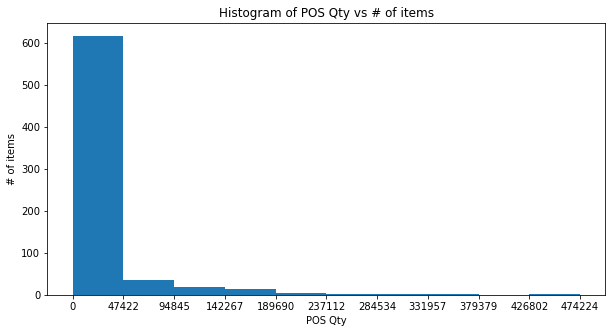

In [27]:
## POS quantity histogram
import numpy as np

#default 10 bins
count, bin_edges = np.histogram(Item_Sum_df["POS Qty"])
Item_Sum_df["POS Qty"].plot(kind = 'hist',figsize=(10,5),xticks=bin_edges)

plt.title('Histogram of POS Qty vs # of items')
plt.ylabel('# of items')
plt.xlabel('POS Qty')

Text(0.5, 0, 'POS Sales')

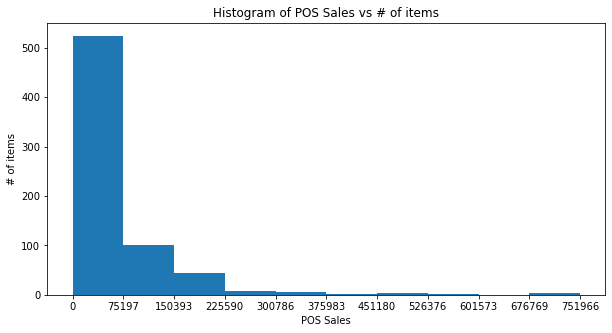

In [28]:
#default 10 bins
count, bin_edges = np.histogram(Item_Sum_df["POS Sales"])
Item_Sum_df["POS Sales"].plot(kind = 'hist',figsize=(10,5),xticks=bin_edges)

plt.title('Histogram of POS Sales vs # of items')
plt.ylabel('# of items')
plt.xlabel('POS Sales')

Text(0.5, 0, 'AVG_QTY_PSPW')

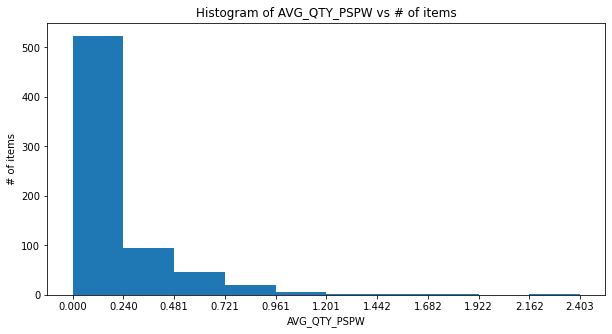

In [29]:
#default 10 bins
count, bin_edges = np.histogram(Item_Sum_df["AVG_QTY_PSPW"])
Item_Sum_df["AVG_QTY_PSPW"].plot(kind = 'hist',figsize=(10,5),xticks=bin_edges)

plt.title('Histogram of AVG_QTY_PSPW vs # of items')
plt.ylabel('# of items')
plt.xlabel('AVG_QTY_PSPW')

Text(0.5, 1.0, 'POS Quantity vs Store Count')

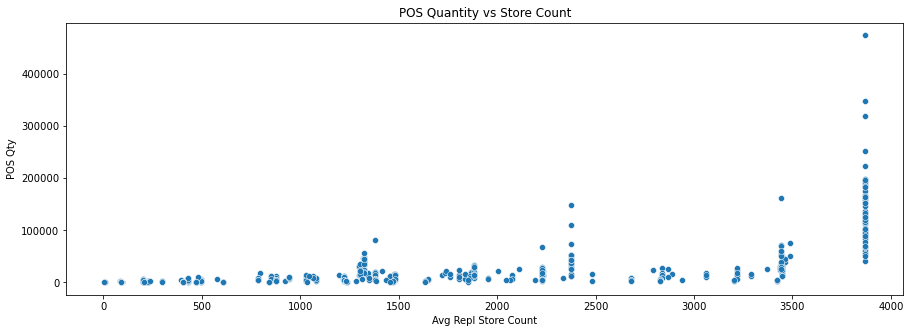

In [31]:
## store count vs POS quantity

plt.figure(figsize = (15,5))
sns.scatterplot(data = Item_Sum_df, x='Avg Repl Store Count', y ='POS Qty')
plt.title('POS Quantity vs Store Count')

Text(0.5, 1.0, 'POS Sales vs Store Count')

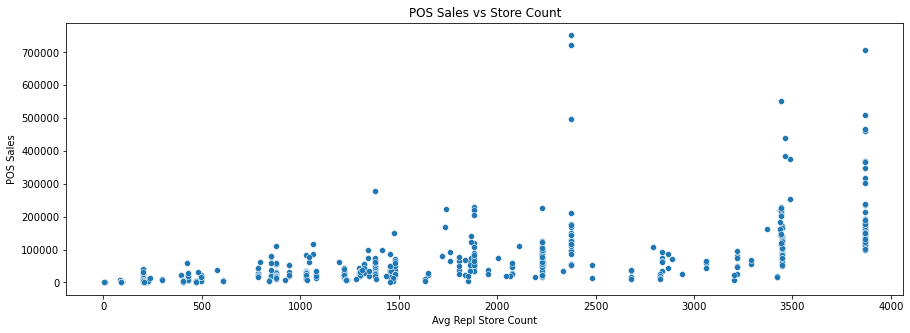

In [33]:
## store count vs POS sales
plt.figure(figsize = (15,5))
sns.scatterplot(data = Item_Sum_df, x='Avg Repl Store Count', y ='POS Sales')
plt.title('POS Sales vs Store Count')

In [36]:
Item_Sum_df[Item_Sum_df['POS Sales']>300000].sort_values(['Avg Repl Store Count'])

,Prime Item Nbr,Prime Item Desc,Vendor Stk Nbr,POS Qty,POS Sales,Avg Repl Store Count,AVG_QTY_PSPW,AVG_SALES_PSPW,Rolling 52/53 WK FC Units
254,569042274,FC WV SD ONYX 2YD,FC2SD005,110272,751965.88,2374.470588,0.911350,6.214668,95425
270,569042312,FC WV SD ONYX 3YD,FC3SD001,72972,723337.87,2375.215686,0.602458,5.971889,77148
243,569033505,FC WV SD ONYX 1YD,FC1SD014,149007,497604.24,2375.862745,1.230010,4.107955,122698
166,558137536,WV SLD BLACK 15-YARD,S96-1,162839,551952.79,3444.372549,0.925807,3.137976,91436
215,569023425,FCFLC CHEV WHT,FC1HFLC06,38505,383379.81,3463.019608,0.218020,2.170744,58155
237,569033453,FCFLC CHEV CHAR,FC1HFLC04,44243,440700.70,3463.294118,0.250479,2.495001,58497
15,554726540,WV CF MUSLIN,CFM1501,75050,374309.37,3487.333333,0.421969,2.104559,66494
292,573626487,WV BUNDLE BATIK,PB1905,120649,708413.63,3868.196078,0.611662,3.591488,79355
296,573626496,WV BUNDLE ONYX,PB1902,59247,347643.70,3869.490196,0.300265,1.761867,23525
60,554738323,WV PCQ SLD WHITE,PCS1543,318814,467354.92,3869.725490,1.615450,2.368113,233149


Text(0.5, 1.0, 'POS Sales by items')

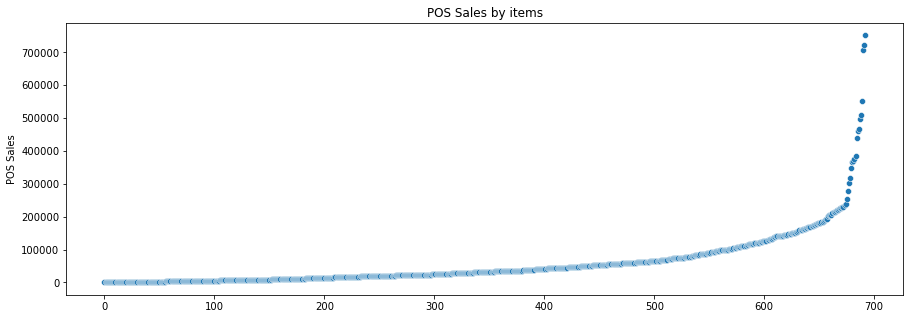

In [88]:
## store count vs POS sales
plt.figure(figsize = (15,5))
accum_df = Item_Sum_df.sort_values(['POS Sales']).reset_index()
sns.scatterplot(data = accum_df, x=accum_df.index, y ='POS Sales')
plt.title('POS Sales by items')

In [48]:
## Kmeans clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
col_train = ['POS Qty','POS Sales','Avg Repl Store Count','AVG_QTY_PSPW','AVG_SALES_PSPW','Rolling 52/53 WK FC Units']

feature_mtx = StandardScaler().fit_transform(Item_Sum_df[col_train])

k_means = KMeans(init = "k-means++", n_clusters = 6, n_init = 12)
k_means.fit(feature_mtx)

k_means_labels = k_means.labels_
Item_Sum_df['k_means_group'] = k_means_labels
cal_group = {'POS Qty':'mean', 'POS Sales':'mean', 'Avg Repl Store Count':'mean','AVG_QTY_PSPW':'mean','AVG_SALES_PSPW':'mean','Rolling 52/53 WK FC Units':'mean'}
Item_Sum_df.groupby(['k_means_group']).agg(cal_group)

,POS Qty,POS Sales,Avg Repl Store Count,AVG_QTY_PSPW,AVG_SALES_PSPW,Rolling 52/53 WK FC Units
k_means_group,,,,,,
0,4190.150000,15395.792441,737.778485,0.119497,0.450308,3398.773529
1,151927.551724,161993.376897,3870.156863,0.769792,0.820801,99830.379310
2,54983.262295,187837.068525,3266.532305,0.330220,1.187378,42759.950820
3,209052.400000,531694.922000,3129.737255,1.250790,3.612850,138549.500000
4,21300.047619,57827.001810,1170.227496,0.371047,1.108767,13902.419048
5,14967.162162,60184.227095,2575.768217,0.125392,0.510989,12884.925676


In [50]:
## Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
x = Item_Sum_df[col_train].values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)

agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)

Item_Sum_df['agglom_group'] = agglom.labels_
Item_Sum_df.groupby(['agglom_group']).agg(cal_group)

,POS Qty,POS Sales,Avg Repl Store Count,AVG_QTY_PSPW,AVG_SALES_PSPW,Rolling 52/53 WK FC Units
agglom_group,,,,,,
0,91463.048193,176465.711205,3700.841956,0.473615,0.939615,62443.132530
1,2620.715640,12805.753412,354.814430,0.152927,0.655116,2108.606635
2,14727.489744,49718.030923,1764.767702,0.180291,0.582149,11575.233333
3,380147.666667,478748.500000,3870.071895,1.926114,2.425742,250148.000000
4,116683.000000,683917.542500,3015.563725,0.762819,4.729005,85841.000000
5,115699.000000,387936.415000,1877.529412,1.200734,4.032229,87697.000000


In [68]:
## DBSCAN
from sklearn.cluster import DBSCAN
feature_mtx = StandardScaler().fit_transform(Item_Sum_df[col_train])

epsilon = 0.7
minimumSamples = 50
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(feature_mtx)
Item_Sum_df['DBSCAN_group'] = db.labels_
Item_Sum_df.groupby(['DBSCAN_group']).agg(cal_group)

,POS Qty,POS Sales,Avg Repl Store Count,AVG_QTY_PSPW,AVG_SALES_PSPW,Rolling 52/53 WK FC Units
DBSCAN_group,,,,,,
-1,64265.315508,144087.177487,2562.461753,0.474646,1.198593,44459.256684
0,7330.205534,29134.755672,1222.415637,0.127201,0.500744,6121.260870


Text(0.5, 1.0, 'POS Quantity vs Store Count under k_means_group')

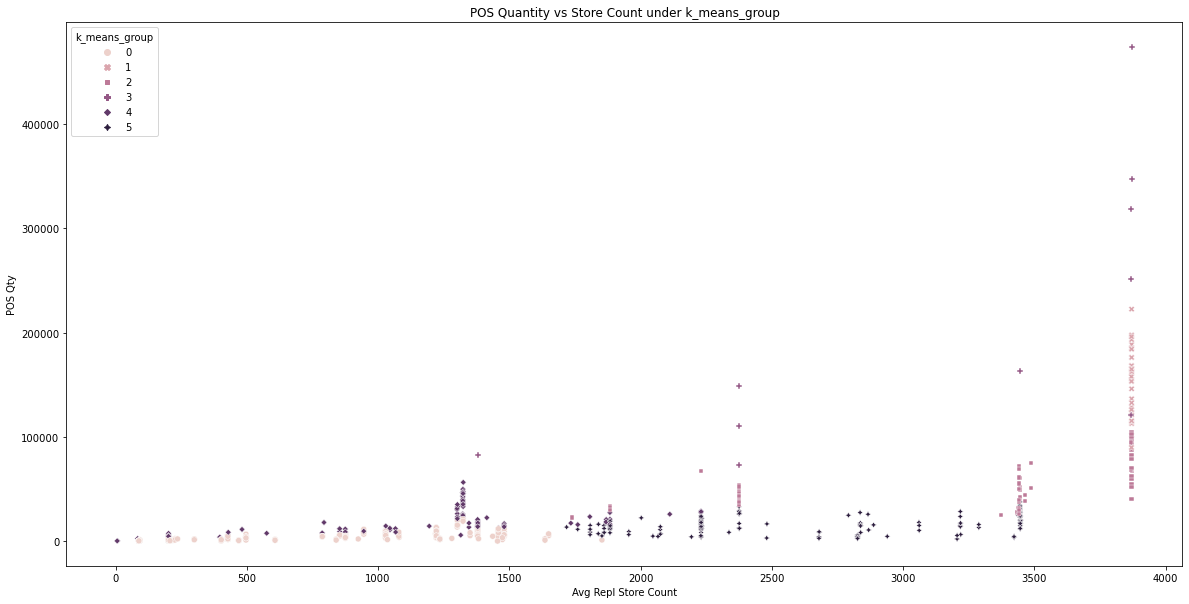

In [78]:
plt.figure(figsize = (20,10))
sns.scatterplot(data = Item_Sum_df, x='Avg Repl Store Count', y ='POS Qty',style ='k_means_group',hue ='k_means_group')
plt.title('POS Quantity vs Store Count under k_means_group')

In [77]:
## save to CSV

from project_lib import Project
project = Project(None, '26a658d1-973d-418f-9b60-a9f1e304f2b8', 'p-27cfa95d2c21b3b1b674f1c27e26265b518e6656')
project.save_data(data=Item_Sum_df.to_csv(index=False),file_name='Item_Sum.csv',overwrite=True)


{'file_name': 'Item_Sum.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'walmartitemsclusteringgrouping-donotdelete-pr-tmytuzbvnpl4rv',
 'asset_id': '193cf0e8-2b70-4adb-a615-d5fd314d736b'}